In [35]:
import librosa
import torchaudio
import os
from tqdm import tqdm
import random as r
# from sklearn import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn
import pickle 
import matplotlib.pyplot as plt

In [2]:
# path = "data/rendered_audio/rendered_audio/"
# files = os.listdir(path)
# r.shuffle(files)
# fs = []
# embeddings = []

# for file in tqdm(files):
#     if ".flac" in file:
#         try:
#             full_path = path + file
#             audio, _ = torchaudio.load(full_path)

#             encoding = librosa.feature.mfcc(y=audio.squeeze(0).numpy(), sr=44100, n_fft=4096, hop_length=2048, n_mfcc=20)
#             encoding = encoding.T
#             embeddings.append(encoding)
#             fs.append(full_path)
#         except Exception as e:
#             print("error", e)
            
with open('mfcc_features.pkl', 'rb') as f:
    embeddings = pickle.load(f)


In [3]:
# with open('mfcc_features.pkl', 'wb') as f:
#     pickle.dump(embeddings, f)

In [4]:
emb = [e.flatten() for e in embeddings]

In [41]:
pca = PCA(n_components=3, svd_solver='full')
pca_ = pca.fit_transform(emb)

In [42]:
kmean_model = KMeans(n_clusters=11).fit(pca_)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
labels = kmean_model.predict(pca_)

In [44]:
feature_a = []
feature_b = []
feature_c = []
# feature_d = []
# feature_e = []

for i in pca_:
    feature_a.append(i[0])
    feature_b.append(i[1])
    feature_c.append(i[2])
    # feature_d.append(i[3])
    # feature_e.append(i[4])

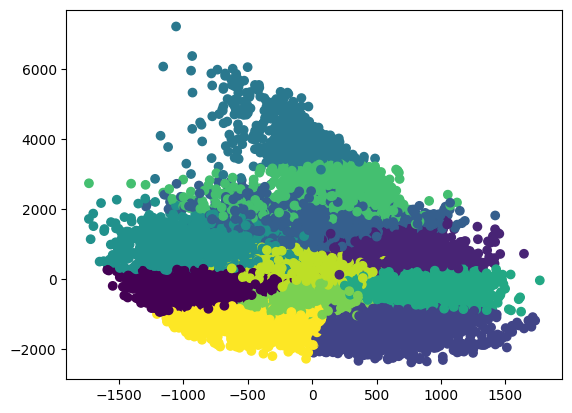

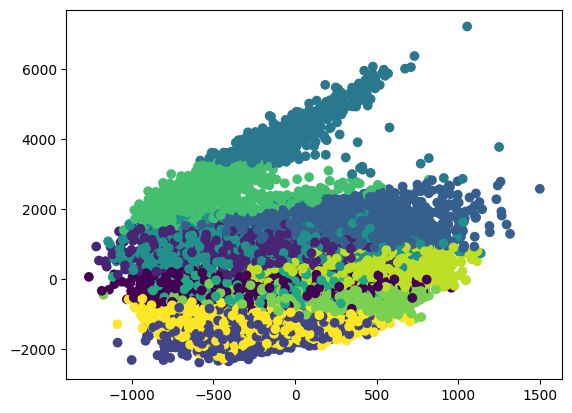

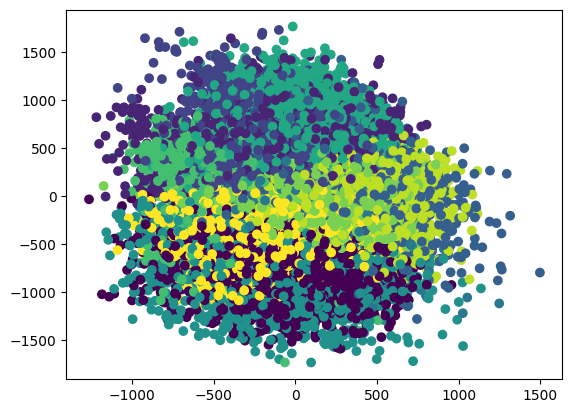

In [45]:
plots = [feature_a, feature_b, feature_c]#, feature_d, feature_e]

for idx, val in enumerate(plots):
    for idx1, val1 in enumerate(plots):
        if idx > idx1:
            #plotting the results
            plt.scatter(val, val1, c=labels)
            plt.show()

In [46]:
# import pandas as pd

# df = pd.DataFrame()
# df['file'] = fs
# df['label'] = labels
# df['pca_feature_a'] = feature_a
# df['pca_feature_b'] = feature_b
# df['pca_feature_c'] = feature_c

NameError: name 'fs' is not defined

In [ ]:
df

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

import pandas as pd
import numpy as np
from ipywidgets import interactive, HBox, VBox

py.init_notebook_mode()

f = go.FigureWidget([go.Scatter3d(x = df['pca_feature_a'], y = df['pca_feature_b'], z=df['pca_feature_c'])])
scatter = f.data[0]
N = len(df)
scatter.x = scatter.x + np.random.rand(N)/10 *(df['pca_feature_a'].max() - df['pca_feature_a'].min())
scatter.y = scatter.y + np.random.rand(N)/10 *(df['pca_feature_b'].max() - df['pca_feature_b'].min())
scatter.z = scatter.z + np.random.rand(N)/10 *(df['pca_feature_c'].max() - df['pca_feature_c'].min())
scatter.marker.opacity = 0.5

def update_axes(xaxis, yaxis, zaxis):
    scatter = f.data[0]
    scatter.x = df[xaxis]
    scatter.y = df[yaxis]
    scatter.z = df[zaxis]
    with f.batch_update():
        f.layout.xaxis.title = xaxis
        f.layout.yaxis.title = yaxis
        f.layout.zaxis.title = zaxis
        scatter.x = scatter.x + np.random.rand(N)/10 *(df[xaxis].max() - df[xaxis].min())
        scatter.y = scatter.y + np.random.rand(N)/10 *(df[yaxis].max() - df[yaxis].min())
        scatter.z = scatter.y + np.random.rand(N)/10 *(df[yaxis].max() - df[yaxis].min())

axis_dropdowns = interactive(update_axes, xaxis = df.select_dtypes('int64').columns, yaxis = df.select_dtypes('int64').columns,  zaxis = df.select_dtypes('int64').columns)

# # Create a table FigureWidget that updates on selection from points in the scatter plot of f
# t = go.FigureWidget([go.Table(
#     header=dict(values=['pca_feature_a','pca_feature_b','pca_feature_c'],
#                 fill = dict(color='#C2D4FF'),
#                 align = ['left'] * 5),
#     cells=dict(values=[df[col] for col in ['pca_feature_a','pca_feature_b','pca_feature_c']],
#                fill = dict(color='#F5F8FF'),
#                align = ['left'] * 5))])

# def selection_fn(trace,points,selector):
#     t.data[0].cells.values = [df.loc[points.point_inds][col] for col in ['pca_feature_a','pca_feature_b','pca_feature_c']]

# scatter.on_selection(selection_fn)

# Put everything together
VBox((HBox(axis_dropdowns.children),f,t))